In [14]:
import numpy as np
from sklearn.metrics import mean_squared_error

In [35]:
def relu(inp):
    return max(0, inp)

def predict_output(input_data, weights):
    node0 = (input_data * weights['node_0']).sum()
    node0 = relu(node0)
    print(node0)
    node1 = (input_data * weights['node_1']).sum()
    node1 = relu(node1)
    print(node1)
    hidden0 = np.array([node0, node1])
    modelOut = (hidden0 * weights['output']).sum()
    modelOut = relu(modelOut)
    
    return modelOut

input_data = np.array([0, 3])
weights = {'node_0': [2, 1], 'node_1': [1, 2], 'output': [1, 1]}

actual_output = 3
result = predict_output(input_data, weights)
print(result)
error = mean_squared_error(np.array([result]), np.array([actual_output]))
print("error: " + str(error))

'''weights_mod = {'node_0': [2, 1], 'node_1': [1, 2], 'output': [1, 0]}
result = predict_output(input_data, weights_mod)
print("required: " + str(result))
'''

3
6
9
error: 36.0


'weights_mod = {\'node_0\': [2, 1], \'node_1\': [1, 2], \'output\': [1, 0]}\nresult = predict_output(input_data, weights_mod)\nprint("required: " + str(result))\n'

In [37]:
preds = (input_data * weights["output"]).sum()
print(preds)
err = actual_output - preds
slope = 2 * input_data * err
print(slope)

3
[0 0]


In [41]:
np.random.randn(50, 2) - 2 * np.ones((50, 2))

array([[-1.31603756, -1.87239049],
       [-1.36741148, -2.22662808],
       [-1.92851983, -0.22908363],
       [-2.53033333, -1.35468091],
       [-0.8065295 , -3.02486839],
       [-1.83565767, -0.44415151],
       [-2.09706063, -2.21455725],
       [-0.30444219, -0.53359485],
       [-2.71188099, -1.2032539 ],
       [-2.60453876, -2.38213572],
       [-2.55794238, -0.83525083],
       [-0.93992352, -1.29384472],
       [-0.64593481, -2.42465987],
       [-1.56070571, -1.20321506],
       [-1.4739609 , -1.48687581],
       [-2.83662735, -1.12168577],
       [-3.214825  , -2.31051121],
       [-0.9052412 , -2.10598986],
       [-3.91274686,  0.09018363],
       [-3.59753385, -2.01709571],
       [-2.49095604, -2.25824717],
       [-2.05232547, -1.9968705 ],
       [-1.11637454, -3.4133853 ],
       [-3.86420548, -2.21212006],
       [-1.72431111, -2.02338782],
       [-0.31118088, -3.108793  ],
       [-2.64045611, -2.1257073 ],
       [-1.40262254, -2.25119097],
       [-2.44527193,

## for printing out the submission file.

    First you need to convert the required things like id's and stuff into it's respective datatypes.
    As DataFrame only takes numpy arrays as inputs, converting into the numpy array would make it error-free
    Eg: pid = np.array(dataset["pid"]).astype(int)
    
    Now, all that is left is to convert the required columns and predictions into a dataframe
    Eg: sol = pd.DataFrame(my_predictions, pid, columns = ["Column-names seperated by commas"])
    
    Now, the last step is to convert this dataframe into a csv using the pandas to_csv() function
    Eg: sol.to_csv("sol.csv", index_label = ["pid"])
    
    Note: While dealing with Kaggle submissions, consider the exact way in which the data is to be submitted
            Failing which will produce errors

In [133]:
import pandas as pd
from sklearn import tree

train_set = pd.read_csv("train.csv")
test_set = pd.read_csv("test.csv")

In [134]:
#print(train_set.describe())
#print(test_set.describe())
##print(train_set["Survived"][train_set["Sex"] == "male"].value_counts())
##print(train_set["Survived"][train_set["Sex"] == "female"].value_counts())
train_set["Child"] = 0
test_set["Child"] = 0

train_set["Child"][train_set["Age"] <18] = 1
test_set["Child"][test_set["Age"] < 18] = 1

#print(test_set[["Age", "Child"]])
#print(train_set[["Age", "Child"]])

test_set["Age"] = test_set["Age"].fillna(test_set["Age"].mean())
train_set["Age"] = train_set["Age"].fillna(train_set["Age"].mean())

train_set["Sex"][train_set["Sex"] == "male"] = 0
train_set["Sex"][train_set["Sex"] == "female"] = 1

train_set["Embarked"] = train_set["Embarked"].fillna("S")
train_set["Embarked"][train_set["Embarked"] == "S"] = 0
train_set["Embarked"][train_set["Embarked"] == "C"] = 1
train_set["Embarked"][train_set["Embarked"] == "Q"] = 2


'''
print(train_set.head())
print(test_set.head())
'''

Xdat = train_set[["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked", "Child"]].values
ydat = train_set["Survived"].values

#print(train_set["Embarked"])


C:\Users\Praneet\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Praneet\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\Praneet\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Praneet\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying t

In [135]:
treeModel = tree.DecisionTreeClassifier()
treeModel = treeModel.fit(Xdat, ydat)

print(treeModel.score(Xdat, ydat))

0.982042648709


In [136]:
test_set["Embarked"] = test_set["Embarked"].fillna("S")
test_set["Sex"][test_set["Sex"] == "male"] = 0
test_set["Sex"][test_set["Sex"] == "female"] = 1
test_set["Embarked"][test_set["Embarked"] == "S"] = 0
test_set["Embarked"][test_set["Embarked"] == "C"] = 1
test_set["Embarked"][test_set["Embarked"] == "Q"] = 2

print(test_set["Embarked"])

0      2
1      0
2      2
3      0
4      0
5      0
6      2
7      0
8      1
9      0
10     0
11     0
12     0
13     0
14     0
15     1
16     2
17     1
18     0
19     1
20     1
21     0
22     0
23     1
24     1
25     0
26     1
27     1
28     0
29     1
      ..
388    2
389    0
390    0
391    0
392    0
393    0
394    0
395    0
396    2
397    1
398    0
399    2
400    0
401    0
402    1
403    0
404    1
405    1
406    0
407    1
408    2
409    0
410    2
411    2
412    0
413    0
414    1
415    0
416    0
417    1
Name: Embarked, Length: 418, dtype: object


C:\Users\Praneet\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Praneet\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Praneet\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\Praneet\Anacon

In [144]:
#print(test_set["Embarked"])
#print(test_set["Fare"])
test_set["Fare"] = test_set["Fare"].fillna(test_set["Fare"].mean())
test_X = test_set[["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked", "Child"]].values
print(test_set.isnull().any())
predictions = treeModel.predict(test_X)

PassengerId    False
Pclass         False
Name           False
Sex            False
Age            False
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked       False
Child          False
dtype: bool


In [147]:
predictions

array([0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0,

In [151]:
solution = pd.DataFrame(predictions, np.array(test_set["PassengerId"]).astype(int), columns = ["Survived"])
print(solution)

solution.to_csv("titanic_solution_0.csv", index_label = ["PassengerId"])

      Survived
892          0
893          0
894          1
895          1
896          1
897          0
898          0
899          0
900          1
901          0
902          0
903          0
904          1
905          1
906          1
907          1
908          0
909          1
910          1
911          0
912          1
913          1
914          1
915          0
916          1
917          0
918          1
919          1
920          1
921          0
...        ...
1280         0
1281         0
1282         0
1283         1
1284         0
1285         0
1286         0
1287         1
1288         0
1289         1
1290         0
1291         0
1292         1
1293         0
1294         1
1295         1
1296         0
1297         1
1298         0
1299         0
1300         0
1301         1
1302         0
1303         1
1304         0
1305         0
1306         1
1307         0
1308         0
1309         1

[418 rows x 1 columns]


In [148]:
test_set.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Child
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,NaN,2,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,NaN,0,0
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,NaN,2,0
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,NaN,0,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,NaN,0,0


In [177]:
#?tree.DecisionTreeClassifier
train_set["Family"] = train_set.SibSp + train_set.Parch + 1
modX = train_set[["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked", "Child", "Family"]].values
treeMod2 = tree.DecisionTreeClassifier(max_depth = 10, min_samples_split = 5, random_state = 1)
treeMod2 = treeMod2.fit(modX, ydat)

print(treeMod2.score(modX, ydat))

0.904601571268


In [178]:
test_set["Family"] = test_set.SibSp + test_set.Parch + 1
test_X = test_set[["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked", "Child", "Family"]].values
pred2 = treeMod2.predict(test_X)

In [179]:
sol = pd.DataFrame(pred2, np.array(test_set["PassengerId"]).astype(int), columns = ["Survived"])

sol.to_csv("titanic_sol_1.csv", index_label = ["PassengerId"])

In [180]:
## Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators = 100, max_depth = 10, min_samples_split = 5, random_state = 1)

rfc = rfc.fit(modX, ydat)
print(rfc.score(modX, ydat))

0.915824915825


In [187]:
rfc.feature_importances_

array([ 0.1099401 ,  0.34703978,  0.16698838,  0.02995099,  0.02471021,
        0.21098075,  0.03074632,  0.02008417,  0.05955929])

In [181]:
rfcPreds = rfc.predict(test_X)

In [182]:
rfcSol = pd.DataFrame(rfcPreds, np.array(test_set["PassengerId"]).astype(int), columns = ["Survived"])
rfcSol.to_csv("titatnic_rfc_0.csv", index_label = "PassengerId")

In [185]:
XwoFam = train_set[["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked", "Child"]].values
tesWoFam = test_set[["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked", "Child"]].values
rfcWoFam = RandomForestClassifier(n_estimators = 100, max_depth = 10, min_samples_split = 5, random_state = 1)
rfcWoFam = rfcWoFam.fit(XwoFam, ydat)

print(rfcWoFam.score(XwoFam, ydat))

0.915824915825


In [186]:
rfcWoFamPreds = rfcWoFam.predict(tesWoFam)

rfcWoFamSol = pd.DataFrame(rfcWoFamPreds, np.array(test_set["PassengerId"]).astype(int), columns = ["Survived"])
rfcWoFamSol.to_csv("titatnic_rfcWoFam_1.csv", index_label = "PassengerId")

In [205]:
import matplotlib.pyplot as plt

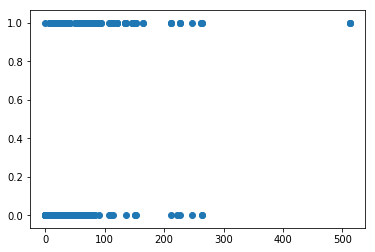

In [206]:
plt.scatter(train_set["Fare"].values, train_set["Survived"].values)
plt.show()

In [207]:
rfc.feature_importances_

array([ 0.1099401 ,  0.34703978,  0.16698838,  0.02995099,  0.02471021,
        0.21098075,  0.03074632,  0.02008417,  0.05955929])

In [208]:
train_set.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Child,Family
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0,0,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1,0,2
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0,0,2
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0,0,1


In [209]:
?pd.melt